Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests

In [2]:
# import CSVs
city_bike_data = pd.read_csv('../data/CityBikeCoordWithBikeNum.csv')
city_bike_df = city_bike_data.round(2)
yelp_restaurent_data_df = pd.read_csv('../data/Yelp_Restaurant_Data.csv')

In [3]:
unique_restuarant_test = yelp_restaurent_data_df['name'].nunique()
unique_restuarant_test

294

In [4]:
city_bike_df

,available_bikes,longitude,latitude
0,3,-79.88,43.26
1,12,-79.87,43.27
2,5,-79.87,43.27
3,7,-79.87,43.26
4,0,-79.87,43.26
...,...,...,...
139,8,-79.87,43.26
140,4,-79.91,43.26
141,9,-79.87,43.25
142,8,-79.91,43.26


In [5]:
# Join both dataframes using long and lat is key
joined_cityBike_Yelp_df = pd.merge(city_bike_df, yelp_restaurent_data_df, left_on=['latitude', 'longitude'], right_on=['latitude','longitude'], how='inner')
joined_cityBike_Yelp_df['Contact#'] = joined_cityBike_Yelp_df['Contact#'].astype(str).str[:10] #fix contact# format
joined_cityBike_Yelp_df

,available_bikes,longitude,latitude,name,rating,pricing,review_count,street address,Is Closed,Contact#
0,3,-79.88,43.26,La Luna,3.8,2.0,66,306 King Street W,False,1905577023
1,3,-79.88,43.26,Pho Nhung,4.4,NaN,18,85 Queen St N,False,1905525800
2,3,-79.88,43.26,The Coop,3.8,2.0,43,274-274 King Street W,False,1289778266
3,3,-79.88,43.26,Ark and Anchor,4.3,2.0,14,300 King Street W,False,1905751934
4,3,-79.88,43.26,Moodys,3.8,NaN,14,107 George Street,False,1289309644
...,...,...,...,...,...,...,...,...,...,...
20149,1,-79.82,43.25,Boardwalk Cheesesteaks,4.5,NaN,4,131 Ottawa Street North,False,1905393177
20150,1,-79.82,43.25,Simply Italian Bakery,4.5,NaN,2,212 Ottawa Street N,False,1905592163
20151,1,-79.82,43.25,The Parlour Dairy Bar,4.5,NaN,2,224 Ottawa St N,False,1289389555
20152,1,-79.82,43.25,Mike's Subs,3.8,1.0,9,122 Ottawa Street N,False,1905544718


In [6]:
#check if the number of unique restaurants is equal to 294 to verify join operation
uniq_rest = joined_cityBike_Yelp_df['name'].nunique()
uniq_rest

270

In [7]:
#export joined dataframe
joined_cityBike_Yelp_df.to_csv('../data/JoinedData.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

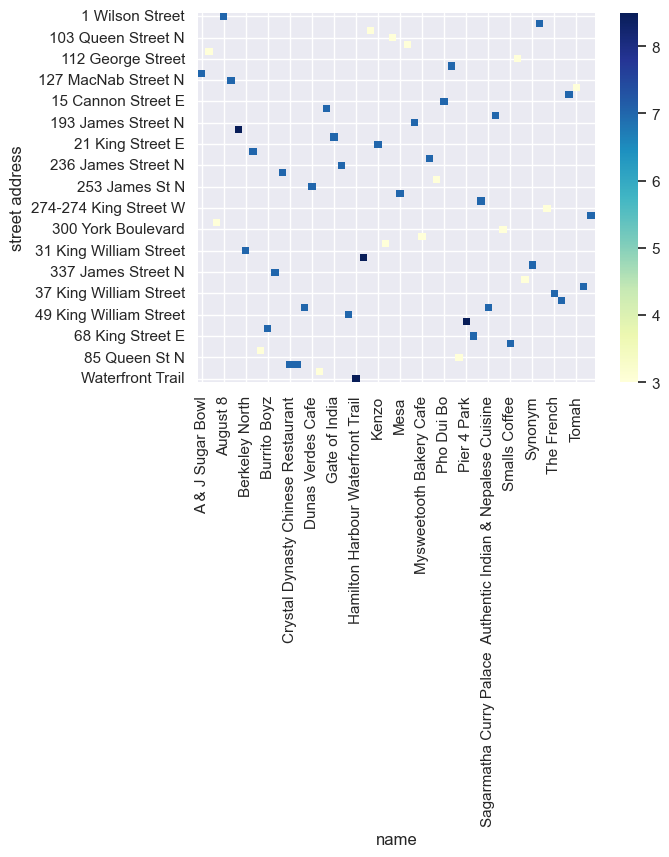

In [35]:
# Heatamp for first 500 rows of dataframe, which street has the highest number of available bikes
sns.set_theme(style="darkgrid")
pivot_table = joined_cityBike_Yelp_df.head(500).pivot_table(
    values='available_bikes', index='street address', columns='name')
# You can choose a different colormap if you want
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.show()

<Axes: >

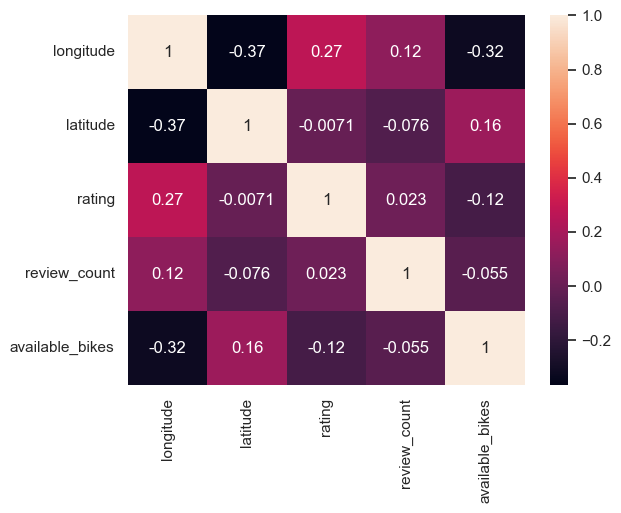

In [36]:
#Heatmap to determine correlation between long lat points, ratings and available bikes
sns.heatmap(joined_cityBike_Yelp_df[['longitude', 'latitude','rating','review_count','available_bikes']].corr(), annot=True)

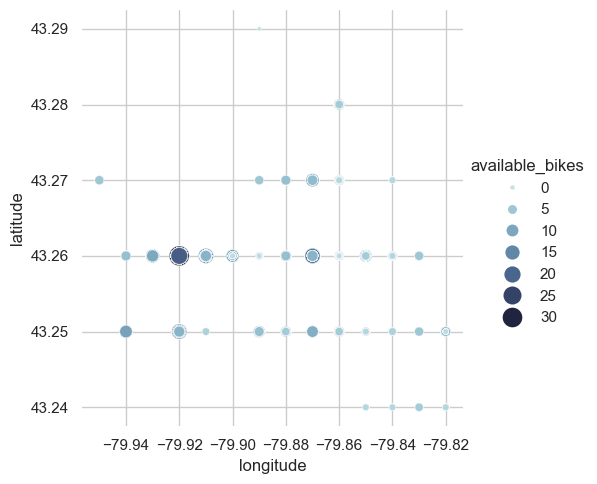

In [37]:
# Relativity plot to determine which long lat point has the highest number of available bikes

sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=joined_cityBike_Yelp_df,
    x="longitude", y="latitude", hue="available_bikes",size="available_bikes",
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# hue="available_bikes"

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [40]:
import sqlite3

conn = sqlite3.connect('../data/yelpRestBikeData.db')
yelp_restaurent_data_df.to_sql('yelpbiketable', conn, if_exists='replace', index=False)

2803

Look at the data before and after the join to validate your data.

In [48]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# count the number of rows after joined data was exported to sqlte database
sql = """
SELECT count(*) from yelpbiketable

"""

sql_query = execute_read_query(conn, sql)
print(sql_query)

[(2803,)]


In [49]:
# getting the length of the dataframe before merge
len(yelp_restaurent_data_df)

2803

Results are equal ie 2803 rows in SQLite db and pre merge dataframe. Data validated